In [ ]:
#pip install ollama

Model: llama2, Time: 313.178760895s
Model: llama3, Time: 347.545391716s
Model: stablelm-zephyr, Time: 262.244742756s
Model: llama2+ctx, Time: 2160.258955724s
Model: llama3+ctx, Time: 237.954082414s
Model: stablelm-zephyr+ctx, Time: 184.623767314s
                     total_duration  load_duration  prompt_eval_count   
llama2                   313.178761       3.013889                106  \
llama3                   347.545392      35.125766                 87   
stablelm-zephyr          262.244743       6.336809                 96   
llama2+ctx              2160.258956      30.345983                139   
llama3+ctx               237.954082      31.340429                120   
stablelm-zephyr+ctx      184.623767       7.163820                129   

                     eval_count  prompt_eval_duration  eval_duration   
llama2                     1306              0.880517     309.282949  \
llama3                      652              1.619323     310.792324   
stablelm-zephyr          

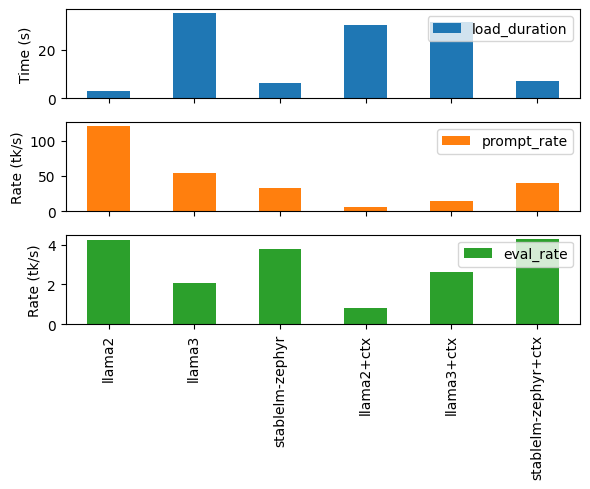

In [1]:
import ollama
import pandas as pd
import matplotlib.pyplot as plt

# question
q = '''Imagine that you are amateur person that wants to run a marathon in one year. This person about 10 hours to practice during week. Create plan that will last one year. Today is 23 April 2024 Create goal for every month. Include full name of every month and full date in format dd-mm-yyyy. Try to explain every task as precisely as you can.'''

# context
cntx = '''Your job will be play a role as content provider to the web application. You will get a task description and your job is to prepare plan for certain goal'''

# models
models = ['llama2','llama3','stablelm-zephyr']

# store results
r = []
idx = []
# prompt without context
pmpt = f'Question: {q}'
for i,mx in enumerate(models):
    r.append(ollama.generate(model=mx, prompt=pmpt))
    idx.append(mx)
    print(f"Model: {idx[-1]}, Time: {r[-1]['total_duration']/1e9}s")

# prompt with context
pmpt = f'Context: {cntx} Question: {q}'
for i,mx in enumerate(models):
    r.append(ollama.generate(model=mx, prompt=pmpt))
    idx.append(mx+'+ctx')
    print(f"Model: {idx[-1]}, Time: {r[-1]['total_duration']/1e9}s")

# put results in DataFrame
rcols = ['total_duration','load_duration',
         'prompt_eval_count','eval_count',
         'prompt_eval_duration','eval_duration']
data = {}
for i,x in enumerate(rcols):
    if (i==2) or (i==3):
        data[x] = [ri[x] for ri in r]
    else:
        data[x] = [ri[x]/1e9 for ri in r]
data = pd.DataFrame(data, index=idx)
data['calc_duration'] = data['total_duration']-data['load_duration']
data['prompt_rate'] = data['prompt_eval_count']/data['prompt_eval_duration']
data['eval_rate'] = data['eval_count']/data['eval_duration']
print(data)

pcols = ['load_duration','prompt_rate','eval_rate']
axs = data[pcols].plot(figsize=(6,5),kind='bar',subplots=True)
ylb = ['Time (s)','Rate (tk/s)','Rate (tk/s)']
for i,ax in enumerate(axs):
    ax.set_title('')
    ax.set_ylabel(ylb[i])
plt.tight_layout(); plt.savefig('results.png',dpi=300); plt.show()